In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score



In [ ]:
data=pd.read_csv('/content/cgm.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time of Reading  1936 non-null   object 
 1   blood            1936 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB


In [ ]:
data.head()

,Time of Reading,blood
0,Tue Mar 26 09:17:00 IST 2024,184.76
1,Tue Mar 26 09:32:00 IST 2024,175.95
2,Tue Mar 26 09:47:00 IST 2024,171.59
3,Tue Mar 26 10:02:00 IST 2024,164.00
4,Tue Mar 26 10:17:00 IST 2024,161.85


In [ ]:
data.tail()

,Time of Reading,blood
1931,Wed Apr 17 10:26:00 IST 2024,152.87
1932,Wed Apr 17 10:41:00 IST 2024,133.54
1933,Wed Apr 17 10:56:00 IST 2024,132.39
1934,Wed Apr 17 11:11:00 IST 2024,128.90
1935,Wed Apr 17 11:26:00 IST 2024,124.42


In [ ]:
df= pd.DataFrame(data)

In [ ]:
data['Time of Reading']=pd.to_datetime(df['Time of Reading'])

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
print(data)

         Time of Reading   blood
0    2024-03-26 09:17:00  184.76
1    2024-03-26 09:32:00  175.95
2    2024-03-26 09:47:00  171.59
3    2024-03-26 10:02:00  164.00
4    2024-03-26 10:17:00  161.85
...                  ...     ...
1931 2024-04-17 10:26:00  152.87
1932 2024-04-17 10:41:00  133.54
1933 2024-04-17 10:56:00  132.39
1934 2024-04-17 11:11:00  128.90
1935 2024-04-17 11:26:00  124.42

[1936 rows x 2 columns]


In [ ]:
df['Time of Reading'] = pd.to_datetime(df['Time of Reading'])

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
df['date'] = df['Time of Reading'].dt.date

print(df)

         Time of Reading   blood        date
0    2024-03-26 09:17:00  184.76  2024-03-26
1    2024-03-26 09:32:00  175.95  2024-03-26
2    2024-03-26 09:47:00  171.59  2024-03-26
3    2024-03-26 10:02:00  164.00  2024-03-26
4    2024-03-26 10:17:00  161.85  2024-03-26
...                  ...     ...         ...
1931 2024-04-17 10:26:00  152.87  2024-04-17
1932 2024-04-17 10:41:00  133.54  2024-04-17
1933 2024-04-17 10:56:00  132.39  2024-04-17
1934 2024-04-17 11:11:00  128.90  2024-04-17
1935 2024-04-17 11:26:00  124.42  2024-04-17

[1936 rows x 3 columns]


In [ ]:
unique_dates = df['date'].unique()

In [ ]:
unique_dates_df = pd.DataFrame(unique_dates, columns=['UniqueDates'])
print(unique_dates_df)

   UniqueDates
0   2024-03-26
1   2024-03-27
2   2024-03-28
3   2024-03-29
4   2024-03-30
5   2024-03-31
6   2024-04-01
7   2024-04-02
8   2024-04-03
9   2024-04-04
10  2024-04-05
11  2024-04-06
12  2024-04-07
13  2024-04-08
14  2024-04-09
15  2024-04-10
16  2024-04-11
17  2024-04-12
18  2024-04-13
19  2024-04-14
20  2024-04-15
21  2024-04-16
22  2024-04-17


In [ ]:
if 'blood' in df.columns:
    print("Column 'blood' exists in the DataFrame.")
else:
    print("Column 'blood' does not exist in the DataFrame.")

Column 'blood' exists in the DataFrame.


In [ ]:
column_names = df.columns
print(column_names)

Index(['Time of Reading', 'blood', 'date'], dtype='object')


In [ ]:
print(df['blood'])


0       184.76
1       175.95
2       171.59
3       164.00
4       161.85
         ...  
1931    152.87
1932    133.54
1933    132.39
1934    128.90
1935    124.42
Name: blood, Length: 1936, dtype: float64


In [ ]:
mean_values=df.groupby('date')['blood'].mean()
print(mean_values)

date
2024-03-26    154.868814
2024-03-27    182.556667
2024-03-28    191.195208
2024-03-29    224.264479
2024-03-30    212.284681
2024-03-31    203.904667
2024-04-01    216.347647
2024-04-02    174.003034
2024-04-03    201.152292
2024-04-04    166.131354
2024-04-05    159.797579
2024-04-06    170.313936
2024-04-07    174.570729
2024-04-08    162.449121
2024-04-09    160.513563
2024-04-10    157.097407
2024-04-11    155.040500
2024-04-12    139.787917
2024-04-13    162.178854
2024-04-14    143.790521
2024-04-15    151.263958
2024-04-16    148.971146
2024-04-17    121.407174
Name: blood, dtype: float64


In [ ]:
mean_values_df=pd.DataFrame(mean_values)
print(mean_values_df)

                 blood
date                  
2024-03-26  154.868814
2024-03-27  182.556667
2024-03-28  191.195208
2024-03-29  224.264479
2024-03-30  212.284681
2024-03-31  203.904667
2024-04-01  216.347647
2024-04-02  174.003034
2024-04-03  201.152292
2024-04-04  166.131354
2024-04-05  159.797579
2024-04-06  170.313936
2024-04-07  174.570729
2024-04-08  162.449121
2024-04-09  160.513563
2024-04-10  157.097407
2024-04-11  155.040500
2024-04-12  139.787917
2024-04-13  162.178854
2024-04-14  143.790521
2024-04-15  151.263958
2024-04-16  148.971146
2024-04-17  121.407174


In [ ]:
mean_values_df= mean_values.reset_index()
print(mean_values_df)

          date       blood
0   2024-03-26  154.868814
1   2024-03-27  182.556667
2   2024-03-28  191.195208
3   2024-03-29  224.264479
4   2024-03-30  212.284681
5   2024-03-31  203.904667
6   2024-04-01  216.347647
7   2024-04-02  174.003034
8   2024-04-03  201.152292
9   2024-04-04  166.131354
10  2024-04-05  159.797579
11  2024-04-06  170.313936
12  2024-04-07  174.570729
13  2024-04-08  162.449121
14  2024-04-09  160.513563
15  2024-04-10  157.097407
16  2024-04-11  155.040500
17  2024-04-12  139.787917
18  2024-04-13  162.178854
19  2024-04-14  143.790521
20  2024-04-15  151.263958
21  2024-04-16  148.971146
22  2024-04-17  121.407174


In [ ]:
mean_values_df['dates']=pd.to_datetime(mean_values_df['date'])
print(mean_values_df)

          date       blood      dates
0   2024-03-26  154.868814 2024-03-26
1   2024-03-27  182.556667 2024-03-27
2   2024-03-28  191.195208 2024-03-28
3   2024-03-29  224.264479 2024-03-29
4   2024-03-30  212.284681 2024-03-30
5   2024-03-31  203.904667 2024-03-31
6   2024-04-01  216.347647 2024-04-01
7   2024-04-02  174.003034 2024-04-02
8   2024-04-03  201.152292 2024-04-03
9   2024-04-04  166.131354 2024-04-04
10  2024-04-05  159.797579 2024-04-05
11  2024-04-06  170.313936 2024-04-06
12  2024-04-07  174.570729 2024-04-07
13  2024-04-08  162.449121 2024-04-08
14  2024-04-09  160.513563 2024-04-09
15  2024-04-10  157.097407 2024-04-10
16  2024-04-11  155.040500 2024-04-11
17  2024-04-12  139.787917 2024-04-12
18  2024-04-13  162.178854 2024-04-13
19  2024-04-14  143.790521 2024-04-14
20  2024-04-15  151.263958 2024-04-15
21  2024-04-16  148.971146 2024-04-16
22  2024-04-17  121.407174 2024-04-17


In [ ]:
mean_values_df['days']=mean_values_df['dates'].dt.day_name()
print(mean_values_df)

          date       blood      dates       days
0   2024-03-26  154.868814 2024-03-26    Tuesday
1   2024-03-27  182.556667 2024-03-27  Wednesday
2   2024-03-28  191.195208 2024-03-28   Thursday
3   2024-03-29  224.264479 2024-03-29     Friday
4   2024-03-30  212.284681 2024-03-30   Saturday
5   2024-03-31  203.904667 2024-03-31     Sunday
6   2024-04-01  216.347647 2024-04-01     Monday
7   2024-04-02  174.003034 2024-04-02    Tuesday
8   2024-04-03  201.152292 2024-04-03  Wednesday
9   2024-04-04  166.131354 2024-04-04   Thursday
10  2024-04-05  159.797579 2024-04-05     Friday
11  2024-04-06  170.313936 2024-04-06   Saturday
12  2024-04-07  174.570729 2024-04-07     Sunday
13  2024-04-08  162.449121 2024-04-08     Monday
14  2024-04-09  160.513563 2024-04-09    Tuesday
15  2024-04-10  157.097407 2024-04-10  Wednesday
16  2024-04-11  155.040500 2024-04-11   Thursday
17  2024-04-12  139.787917 2024-04-12     Friday
18  2024-04-13  162.178854 2024-04-13   Saturday
19  2024-04-14  143.

In [ ]:
mean_values_df = mean_values_df.drop(columns=['date'])




In [ ]:
print(mean_values_df)

         blood      dates       days
0   154.868814 2024-03-26    Tuesday
1   182.556667 2024-03-27  Wednesday
2   191.195208 2024-03-28   Thursday
3   224.264479 2024-03-29     Friday
4   212.284681 2024-03-30   Saturday
5   203.904667 2024-03-31     Sunday
6   216.347647 2024-04-01     Monday
7   174.003034 2024-04-02    Tuesday
8   201.152292 2024-04-03  Wednesday
9   166.131354 2024-04-04   Thursday
10  159.797579 2024-04-05     Friday
11  170.313936 2024-04-06   Saturday
12  174.570729 2024-04-07     Sunday
13  162.449121 2024-04-08     Monday
14  160.513563 2024-04-09    Tuesday
15  157.097407 2024-04-10  Wednesday
16  155.040500 2024-04-11   Thursday
17  139.787917 2024-04-12     Friday
18  162.178854 2024-04-13   Saturday
19  143.790521 2024-04-14     Sunday
20  151.263958 2024-04-15     Monday
21  148.971146 2024-04-16    Tuesday
22  121.407174 2024-04-17  Wednesday


In [ ]:
print(mean_values_df['days'])

0       Tuesday
1     Wednesday
2      Thursday
3        Friday
4      Saturday
5        Sunday
6        Monday
7       Tuesday
8     Wednesday
9      Thursday
10       Friday
11     Saturday
12       Sunday
13       Monday
14      Tuesday
15    Wednesday
16     Thursday
17       Friday
18     Saturday
19       Sunday
20       Monday
21      Tuesday
22    Wednesday
Name: days, dtype: object


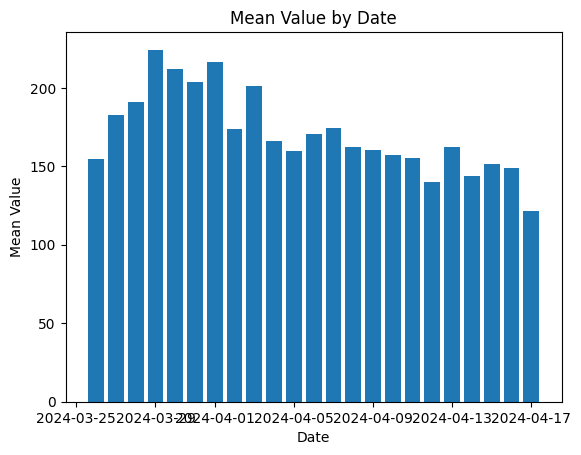

In [ ]:
plt.bar(mean_values_df['dates'], mean_values_df['blood'])
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Mean Value by Date')
plt.show()

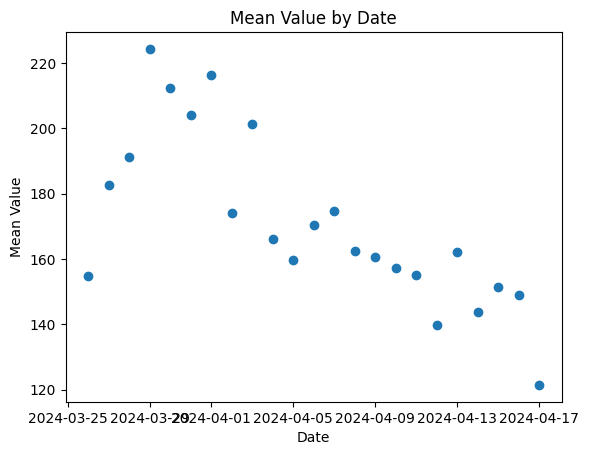

In [ ]:
plt.scatter(mean_values_df['dates'], mean_values_df['blood'])
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Mean Value by Date')
plt.show()

In [ ]:
intake=pd.read_csv('/content/food_intake.csv')

In [ ]:
print(intake)

         Day  total_carbs  total_protein  total_fibre  total_fats
0     Monday        196.1           46.1         21.1        41.3
1    Tuesday        142.1           30.3         17.2        21.2
2  Wednesday        145.7           44.2         29.7        44.2
3   Thursday        226.4           49.8         48.9        61.2
4     Friday        144.4           35.2         25.2        38.6
5   Saturday        206.1          145.8         33.3        54.0
6     Sunday        260.4          117.0         56.1        62.3


In [ ]:
df4=pd.DataFrame(intake)

In [ ]:
print(df4)

         Day  total_carbs  total_protein  total_fibre  total_fats
0     Monday        196.1           46.1         21.1        41.3
1    Tuesday        142.1           30.3         17.2        21.2
2  Wednesday        145.7           44.2         29.7        44.2
3   Thursday        226.4           49.8         48.9        61.2
4     Friday        144.4           35.2         25.2        38.6
5   Saturday        206.1          145.8         33.3        54.0
6     Sunday        260.4          117.0         56.1        62.3


In [ ]:
df4 = df4.rename(columns={'Day': 'days'})


In [ ]:
print(df4)

        days  total_carbs  total_protein  total_fibre  total_fats
0     Monday        196.1           46.1         21.1        41.3
1    Tuesday        142.1           30.3         17.2        21.2
2  Wednesday        145.7           44.2         29.7        44.2
3   Thursday        226.4           49.8         48.9        61.2
4     Friday        144.4           35.2         25.2        38.6
5   Saturday        206.1          145.8         33.3        54.0
6     Sunday        260.4          117.0         56.1        62.3


In [ ]:
mean_values_df = mean_values_df.join(df4.set_index('days'), on='days')


In [ ]:
print(mean_values_df)


         blood      dates       days  total_carbs  total_protein  total_fibre  \
0   154.868814 2024-03-26    Tuesday        142.1           30.3         17.2   
1   182.556667 2024-03-27  Wednesday        145.7           44.2         29.7   
2   191.195208 2024-03-28   Thursday        226.4           49.8         48.9   
3   224.264479 2024-03-29     Friday        144.4           35.2         25.2   
4   212.284681 2024-03-30   Saturday        206.1          145.8         33.3   
5   203.904667 2024-03-31     Sunday        260.4          117.0         56.1   
6   216.347647 2024-04-01     Monday        196.1           46.1         21.1   
7   174.003034 2024-04-02    Tuesday        142.1           30.3         17.2   
8   201.152292 2024-04-03  Wednesday        145.7           44.2         29.7   
9   166.131354 2024-04-04   Thursday        226.4           49.8         48.9   
10  159.797579 2024-04-05     Friday        144.4           35.2         25.2   
11  170.313936 2024-04-06   

In [ ]:
columns_array = mean_values_df.columns.values

print(columns_array)


['blood' 'dates' 'days' 'total_carbs' 'total_protein' 'total_fibre'
 'total_fats']


In [ ]:
X = mean_values_df[['total_carbs', 'total_protein','total_fibre','total_fats']]


In [ ]:
y = mean_values_df['blood']

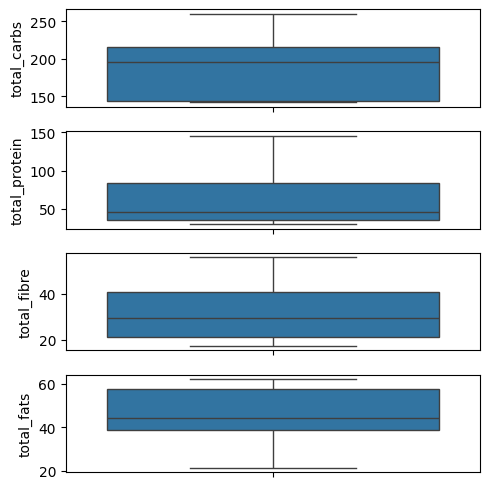

In [ ]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(mean_values_df['total_carbs'], ax = axs[0])
plt2 = sns.boxplot(mean_values_df['total_protein'], ax = axs[1])
plt3 = sns.boxplot(mean_values_df['total_fibre'], ax = axs[2])
plt4 = sns.boxplot(mean_values_df['total_fats'], ax = axs[3])
plt.tight_layout()

In [ ]:
mean_values_df.drop(columns=['days'],inplace=True)

In [ ]:
mean_values_df.drop(columns=['dates'],inplace=True)

In [ ]:
print(mean_values_df)

         blood  total_carbs  total_protein  total_fibre  total_fats
0   154.868814        142.1           30.3         17.2        21.2
1   182.556667        145.7           44.2         29.7        44.2
2   191.195208        226.4           49.8         48.9        61.2
3   224.264479        144.4           35.2         25.2        38.6
4   212.284681        206.1          145.8         33.3        54.0
5   203.904667        260.4          117.0         56.1        62.3
6   216.347647        196.1           46.1         21.1        41.3
7   174.003034        142.1           30.3         17.2        21.2
8   201.152292        145.7           44.2         29.7        44.2
9   166.131354        226.4           49.8         48.9        61.2
10  159.797579        144.4           35.2         25.2        38.6
11  170.313936        206.1          145.8         33.3        54.0
12  174.570729        260.4          117.0         56.1        62.3
13  162.449121        196.1           46.1      

In [ ]:


# assuming 'df' is your dataframe
correlations = mean_values_df.corr()

# print the correlation matrix
print(correlations)

# print the correlation between Value and each independent variable
print("Correlation between blood and total_carbs:", correlations['blood']['total_carbs'])
print("Correlation between blood and total_protein:", correlations['blood']['total_protein'])
print("Correlation between blood and total_fibre:", correlations['blood']['total_fibre'])
print("Correlation between blood and total_fats:", correlations['blood']['total_fats'])


                  blood  total_carbs  total_protein  total_fibre  total_fats
blood          1.000000     0.153289       0.182876     0.091975    0.172178
total_carbs    0.153289     1.000000       0.672178     0.845264    0.835674
total_protein  0.182876     0.672178       1.000000     0.545433    0.638688
total_fibre    0.091975     0.845264       0.545433     1.000000    0.904504
total_fats     0.172178     0.835674       0.638688     0.904504    1.000000
Correlation between blood and total_carbs: 0.15328882659397342
Correlation between blood and total_protein: 0.18287639329274116
Correlation between blood and total_fibre: 0.09197493112017324
Correlation between blood and total_fats: 0.17217799486903046


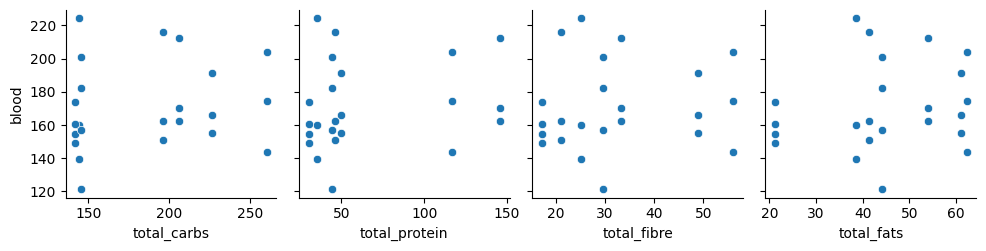

In [ ]:
sns.pairplot(mean_values_df, x_vars=['total_carbs', 'total_protein', 'total_fibre', 'total_fats'], y_vars='blood')
plt.show()


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [ ]:
y_train.shape


(16,)

In [ ]:
y_test.shape


(7,)

In [ ]:
param_grid_lasso = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True, False]
}


In [ ]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])


In [ ]:
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')


In [ ]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [0.1, 1.0, 10.0],
                         'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

In [ ]:
print("Lasso Regression:")
print("Best parameters:", grid_search_lasso.best_params_)
print('Mean Absolute Error:', mae_lasso)
print('Mean Squared Error:', mse_lasso)
print('Root Mean Squared Error:', rmse_lasso)

Lasso Regression:
Best parameters: {'regressor__alpha': 10.0, 'regressor__fit_intercept': True}
Mean Absolute Error: 19.903094605671296
Mean Squared Error: 626.774109996828
Root Mean Squared Error: 25.035457055880325


In [ ]:
reg_model_diff = pd.DataFrame({'Actual value': y_test.ravel(), 'Predicted value': y_pred_lasso.ravel()})
print(reg_model_diff)


In [ ]:
mape0 = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100

In [ ]:
accuracy = 100 - mape0
print("Accuracy:", accuracy)

Accuracy: 87.77105896159247


In [ ]:
param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True, False]
}


In [ ]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

In [ ]:
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.1, 1.0, 10.0],
                         'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression:")
print("Best parameters:", grid_search_ridge.best_params_)
print('Mean Absolute Error:', mae_ridge)
print('Mean Squared Error:', mse_ridge)
print('Root Mean Squared Error:', rmse_ridge)

Ridge Regression:
Best parameters: {'regressor__alpha': 10.0, 'regressor__fit_intercept': True}
Mean Absolute Error: 26.036531926834936
Mean Squared Error: 848.6108449369848
Root Mean Squared Error: 29.130925919664566


In [ ]:
reg_model_diff = pd.DataFrame({'Actual value': y_test.ravel(), 'Predicted value': y_pred_ridge.ravel()})
print(reg_model_diff)


   Actual value  Predicted value
0    216.347647       171.132006
1    143.790521       188.922395
2    170.313936       184.634720
3    151.263958       171.132006
4    139.787917       168.980501
5    174.570729       188.922395
6    166.131354       180.306481


In [ ]:
mape = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

In [ ]:
accuracy = 100 - mape
print("Accuracy:", accuracy)

Accuracy: 84.07614288039461
